In [82]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('Bank.csv')
df.head()



,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756.0,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443.0,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436.0,no,no,cellular,13,apr,NaN,1,2,0
3,4,63,retired,married,secondary,no,474.0,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354.0,no,no,cellular,30,apr,NaN,1,2,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         27128 non-null  int64  
 1   age        27128 non-null  int64  
 2   job        27128 non-null  object 
 3   marital    27128 non-null  object 
 4   education  27128 non-null  object 
 5   default    27128 non-null  object 
 6   amount     27128 non-null  float64
 7   housing    27128 non-null  object 
 8   loan       27128 non-null  object 
 9   contact    27128 non-null  object 
 10  day        27128 non-null  int64  
 11  month      27128 non-null  object 
 12  duration   20084 non-null  float64
 13  campaign   27128 non-null  int64  
 14  previous   27128 non-null  int64  
 15  y          27128 non-null  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 3.3+ MB


In [84]:
pd.pivot_table(df, index = ['y'] , values= 'duration')


,duration
y,
0,301.424731
1,348.601032


In [85]:
is_null = df['duration'].isnull()
df.loc[(df['y']==0) & is_null,['duration']] = 301.42
df.loc[(df['y']==1) & is_null,['duration']] = 348.60

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         27128 non-null  int64  
 1   age        27128 non-null  int64  
 2   job        27128 non-null  object 
 3   marital    27128 non-null  object 
 4   education  27128 non-null  object 
 5   default    27128 non-null  object 
 6   amount     27128 non-null  float64
 7   housing    27128 non-null  object 
 8   loan       27128 non-null  object 
 9   contact    27128 non-null  object 
 10  day        27128 non-null  int64  
 11  month      27128 non-null  object 
 12  duration   27128 non-null  float64
 13  campaign   27128 non-null  int64  
 14  previous   27128 non-null  int64  
 15  y          27128 non-null  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 3.3+ MB


In [86]:
df.head()


,id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
0,1,39,blue-collar,married,secondary,no,1756.0,yes,no,cellular,3,apr,370.055237,1,0,1
1,2,51,entrepreneur,married,primary,no,1443.0,no,no,cellular,18,feb,233.998933,10,0,1
2,3,36,management,single,tertiary,no,436.0,no,no,cellular,13,apr,301.420000,1,2,0
3,4,63,retired,married,secondary,no,474.0,no,no,cellular,25,jan,252.525808,1,0,0
4,5,31,management,single,tertiary,no,354.0,no,no,cellular,30,apr,301.420000,1,2,0


In [87]:
df['y'].value_counts()


y
0    18445
1     8683
Name: count, dtype: int64

In [88]:
df.columns


Index(['id', 'age', 'job', 'marital', 'education', 'default', 'amount',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'previous', 'y'],
      dtype='object')

In [89]:
df.groupby('job')['y'].mean()


job
admin.           0.306969
blue-collar      0.355080
entrepreneur     0.379650
housemaid        0.282353
management       0.306050
retired          0.366643
self-employed    0.302646
services         0.331205
student          0.159785
technician       0.311067
unemployed       0.251899
unknown          0.292135
Name: y, dtype: float64

In [90]:
pivot_x = [ 'job', 'marital', 'education', 'housing', 'loan']
for name in pivot_x:
    i =df.groupby(name)['y'].mean()

    print(i)
    
    
    

job
admin.           0.306969
blue-collar      0.355080
entrepreneur     0.379650
housemaid        0.282353
management       0.306050
retired          0.366643
self-employed    0.302646
services         0.331205
student          0.159785
technician       0.311067
unemployed       0.251899
unknown          0.292135
Name: y, dtype: float64
marital
divorced    0.334534
married     0.341478
single      0.268468
Name: y, dtype: float64
education
primary      0.351566
secondary    0.319623
tertiary     0.299661
unknown      0.353562
Name: y, dtype: float64
housing
no     0.217196
yes    0.401719
Name: y, dtype: float64
loan
no     0.301167
yes    0.419355
Name: y, dtype: float64


In [91]:
pivot_x = [ 'job', 'marital', 'education', 'housing', 'loan']
for name in pivot_x:
    i =df.groupby(name)['y'].describe()

    print(i)
    
    
    

                count      mean       std  min  25%  50%  75%  max
job                                                               
admin.         3085.0  0.306969  0.461311  0.0  0.0  0.0  1.0  1.0
blue-collar    5886.0  0.355080  0.478578  0.0  0.0  0.0  1.0  1.0
entrepreneur    914.0  0.379650  0.485565  0.0  0.0  0.0  1.0  1.0
housemaid       765.0  0.282353  0.450439  0.0  0.0  0.0  1.0  1.0
management     5620.0  0.306050  0.460892  0.0  0.0  0.0  1.0  1.0
retired        1391.0  0.366643  0.482061  0.0  0.0  0.0  1.0  1.0
self-employed   945.0  0.302646  0.459646  0.0  0.0  0.0  1.0  1.0
services       2506.0  0.331205  0.470741  0.0  0.0  0.0  1.0  1.0
student         557.0  0.159785  0.366735  0.0  0.0  0.0  0.0  1.0
technician     4491.0  0.311067  0.462982  0.0  0.0  0.0  1.0  1.0
unemployed      790.0  0.251899  0.434378  0.0  0.0  0.0  1.0  1.0
unknown         178.0  0.292135  0.456027  0.0  0.0  0.0  1.0  1.0
            count      mean       std  min  25%  50%  75%  max

In [92]:
pd.pivot_table(df,values= 'y', index = 'housing' , columns='loan')

loan,no,yes
housing,,
no,0.20935,0.264294
yes,0.37675,0.520564


In [93]:
print(pd.crosstab(df['y'], df['job'],
                  margins=True, normalize= True))

 

job    admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                           
0    0.078812     0.139929      0.020901   0.020237    0.143763  0.032476   
1    0.034909     0.077042      0.012791   0.007962    0.063403  0.018800   
All  0.113720     0.216971      0.033692   0.028200    0.207166  0.051275   

job  self-employed  services   student  technician  unemployed   unknown  \
y                                                                          
0         0.024292  0.061781  0.017252    0.114052    0.021786  0.004645   
1         0.010543  0.030596  0.003281    0.051497    0.007336  0.001917   
All       0.034835  0.092377  0.020532    0.165549    0.029121  0.006561   

job       All  
y              
0    0.679925  
1    0.320075  
All  1.000000  


In [94]:
str_col = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', ]
str_df = df[str_col]
str_df2 = pd.get_dummies(str_df,dtype='uint8',drop_first=True)

num_df =df.drop(str_col,axis=1)
df2 = pd.concat([num_df,str_df2,str_df],axis=1)
df2.columns

Index(['id', 'age', 'amount', 'day', 'duration', 'campaign', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_sending _document', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month'],
      dtype='object')

In [95]:
train_val, test = train_test_split(df2, test_size = 0.1, random_state =9)
train_val.head()



,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,marital,education,default,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,married,tertiary,no,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,divorced,secondary,no,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,single,tertiary,no,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,single,tertiary,no,yes,no,sending _document,may
26223,26224,47,33.0,5,348.600000,1,0,1,0,0,...,0,0,services,single,secondary,no,yes,no,cellular,may


In [97]:
t = train_val['y']
x = train_val.drop(str_col,axis =1)
x = x.drop(['y','id','day'],axis=1)

x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)
model = tree.DecisionTreeClassifier(random_state=3,max_depth=5)
model.fit(x_train,y_train)
model.score(x_val,y_val)

0.8171206225680934

In [98]:
def learn(x,t,i):
    x_train,x_val,y_train,y_val = train_test_split(x,t, test_size=0.2,random_state=i)
    model = tree.DecisionTreeClassifier(random_state=i,max_depth=i,class_weight ='balanced')
    model.fit(x_train,y_train)
    train_score =model.score(x_train,y_train)
    val_score =model.score(x_val,y_val)
    return train_score,val_score,model
    
    

In [99]:
for i in range(1,20):
    s1,s2,model =learn(x,t,i)
    print(i,s1,s2)

1 0.7567581404874053 0.7513823469178783
2 0.7564509522834323 0.7526110997337703
3 0.7515871390538603 0.7626459143968871
4 0.7779541265615401 0.7710423919721483
5 0.7798996518533688 0.7745238582838418
6 0.8078025803809133 0.8023755887773909
7 0.8358079049764489 0.8242883473274626
8 0.8519352856850297 0.8265410608232644
9 0.8577206635265205 0.8277698136391562
10 0.8771759164448085 0.8337087855826336
11 0.8924329305754659 0.8351423305345075
12 0.9052324390743396 0.8265410608232644
13 0.9134753225476142 0.8228548023755887
14 0.9413782510751587 0.8171206225680934
15 0.9561744828998566 0.8167110382961295
16 0.9591439688715954 0.8165062461601474
17 0.9728138439483924 0.8144583248003276
18 0.9789576080278517 0.8097481056727421
19 0.9892996108949417 0.8150727012082736


In [102]:
 x_train,x_val,y_train,y_val = train_test_split(x,t, test_size=0.2,random_state=11)
model = tree.DecisionTreeClassifier(random_state=11,max_depth=11,class_weight ='balanced')
model.fit(x_train,y_train)
train_score =model.score(x_train,y_train)
val_score =model.score(x_val,y_val)
print(train_score,val_score)


0.8924329305754659 0.8351423305345075


In [107]:
test_t = test['y']
test_x = test.drop(str_col,axis =1)
test_x = test_x.drop(['y','id','day'],axis=1)

model.score(test_x,test_t)

# t = train_val['y']
# x = train_val.drop(str_col,axis =1)
# x = x.drop(['y','id','day'],axis=1)

# x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)
# model = tree.DecisionTreeClassifier(random_state=3,max_depth=5)
# model.fit(x_train,y_train)
# model.score(x_val,y_val)

0.8252856616291928

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=test_x.columns)

importance





In [120]:
importance.sort_values(by= 0, ascending= False)

,0
duration,0.588968
campaign,0.103464
age,0.098452
housing_yes,0.062156
amount,0.036342
loan_yes,0.035800
contact_sending _document,0.013672
previous,0.013405
month_jun,0.003863
month_aug,0.003602


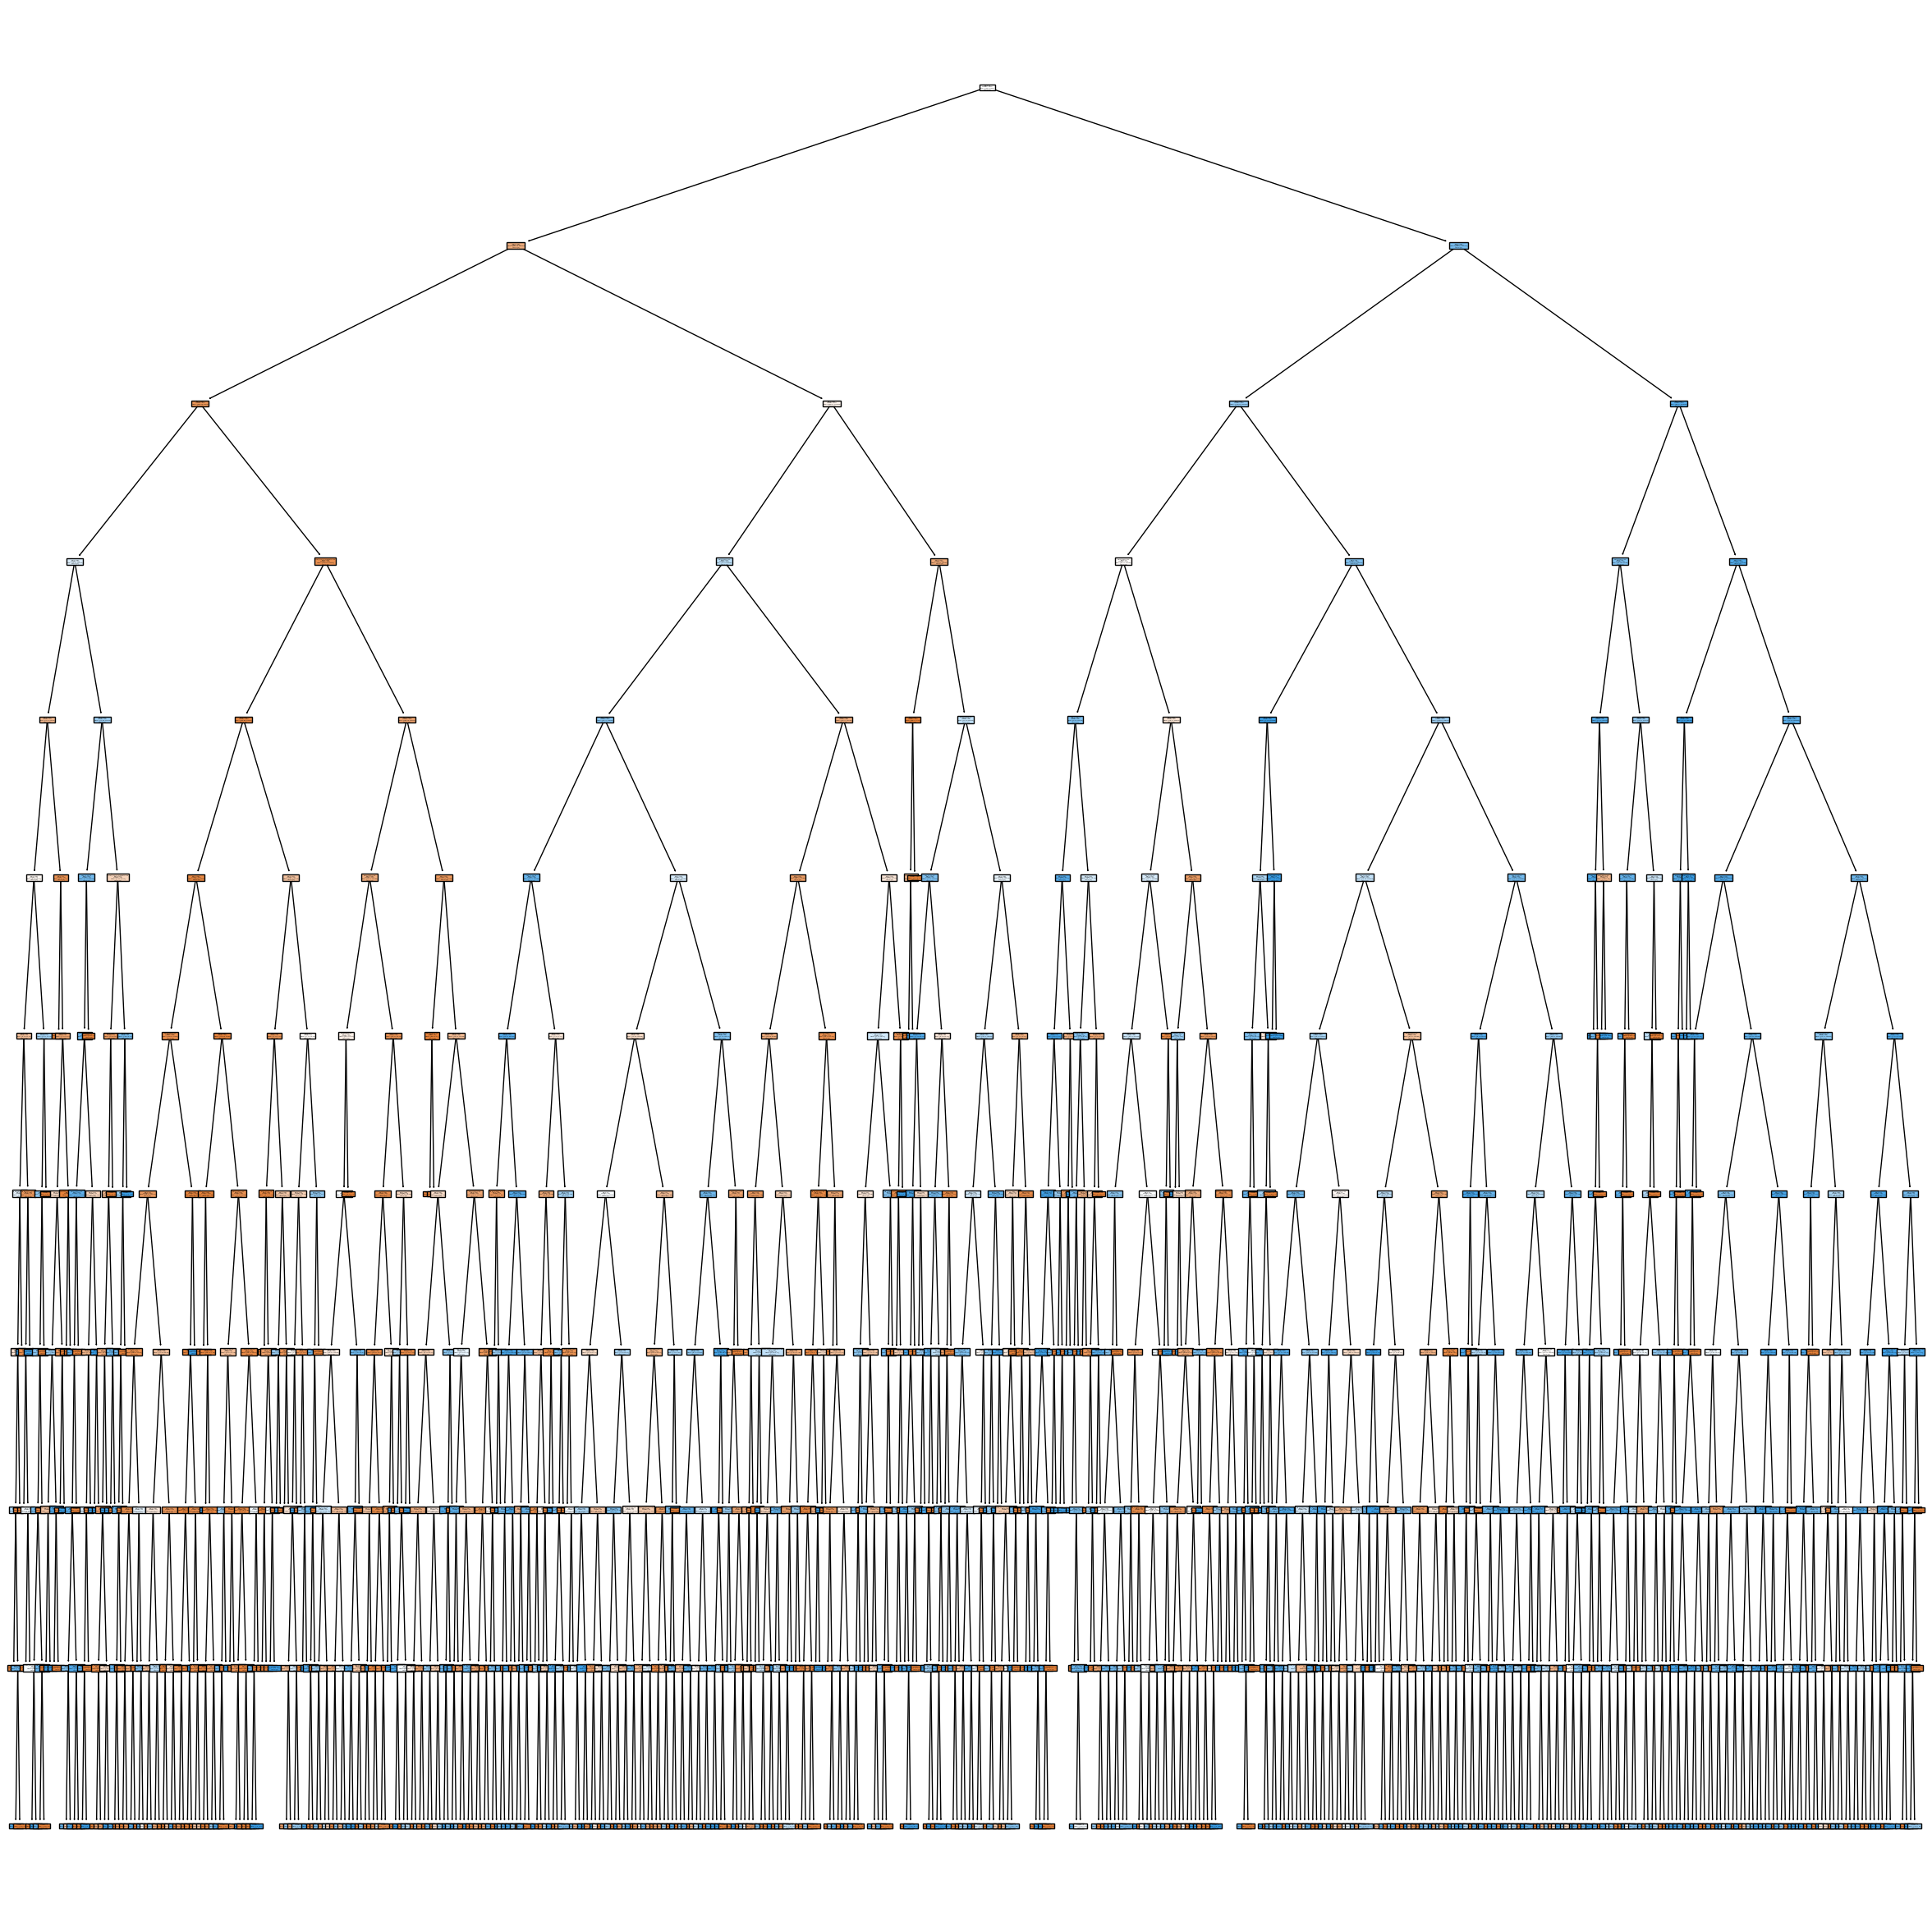

In [126]:
from sklearn.tree import plot_tree
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plot_tree(model, feature_names=x_train.columns,class_names=True, filled=True)
plt.savefig("decision_tree.pdf")

In [ ]:
# plt.figure(figsize=(40,40))
# plot_tree(model, filled=True, feature_names=.feature_names, class_names=data.target_names)
# plt.savefig("decision_tree.pdf")